# Simulation study: Convergence speed of different heuristics

This notebooks corresponds to the experiments of Section 5.3 of the supplementary materials

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import torch

from src.bayes_lin_reg import NIGLinearRegression

from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.gamma import Gamma

from src.weights_optimizer import WeightsOptimizer

In [2]:
dim = 1
n_points = 100
torch.manual_seed(0)
X = torch.randn(n_points, dim) * 1
X = torch.cat((torch.ones(n_points, 1), X), dim=1)

sigma = 0.5
true_beta = torch.tensor([0.5, 0.3], dtype=torch.float) 

y = X @ true_beta + torch.randn(n_points) * sigma
data = {"X": X, "y": y}

# Prior
mu0 = torch.zeros(dim + 1, dtype=torch.float32)  # Prior mean vector for beta, including intercept
v0 = torch.eye(dim + 1, dtype=torch.float32) * 100  # Prior covariance matrix for beta, including intercept
a0 = 2.0  # Shape parameter for the inverse gamma prior 
b0 = 2.0 # Rate parameter for the inverse gamma prior

model = NIGLinearRegression(mu0, v0, a0, b0)

# Adversarial
muA, vA, aA, bA = model.posterior_parameters(data)
# Steer the slope towards 0
idx_covariate = 1
muA[idx_covariate] *= 0.0

tauA = aA / bA
tau_adv_dist = Gamma(aA, bA)
beta_adv_dist = MultivariateNormal(muA, vA / tauA)

def sample_adv(n_samples):
    """
    Samples from the adversarial target

    Parameters:
    - n_samples: shape of the output tensor
    """
    
    # Sample the posterior
    sigma2_sample = 1.0 / ( tau_adv_dist.sample(torch.tensor([n_samples])) )
    centered_beta_dist = MultivariateNormal(torch.zeros_like(muA), vA)
    beta_sample = centered_beta_dist.sample((n_samples, ))

    beta_sample = muA + (torch.sqrt(sigma2_sample) * beta_sample.T).T

    return {'beta': beta_sample, 'sigma2': sigma2_sample}



Stopping criterion reached after 17 iterations
first_kl_diff -2.072304
diff_est -0.00014588394
Rounding kl difference: 0.029213319
L1 before rounding: 29.999998
L1 after rounding: 26.0


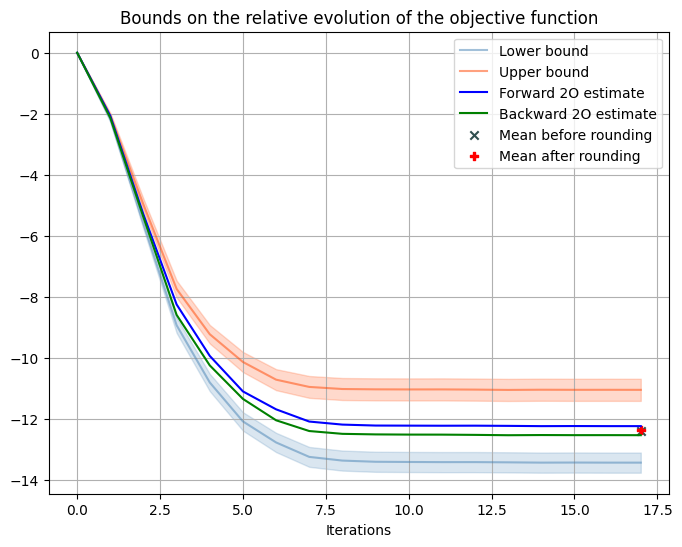

In [3]:
optim = WeightsOptimizer(data, model, sample_adv)

weights = optim.optimize(heuristic="2O-EPA-R2", 
                         max_L1=30,
                         max_iterations=50,
                         n_MC_samples_adv=1000,
                         n_MC_samples_post=100,
                         eps=1e0,
                         betas=(0.9,),
                         make_plots=True,
                         verbose=True)

In [4]:
optim = WeightsOptimizer(data, model, sample_adv)

weights = optim.optimize(heuristic="2O-EPA-R2", 
                         max_L1=30,
                         max_iterations=50,
                         n_MC_samples_adv=100,
                         n_MC_samples_post=20,
                         eps=1e0,
                         betas=(0.9,),
                         make_plots=False,
                         verbose=True)

Stopping criterion reached after 50 iterations
first_kl_diff -2.1731658
diff_est 5.8331596e-05


Rounding kl difference: -0.09886734
L1 before rounding: 29.989077
L1 after rounding: 28.0


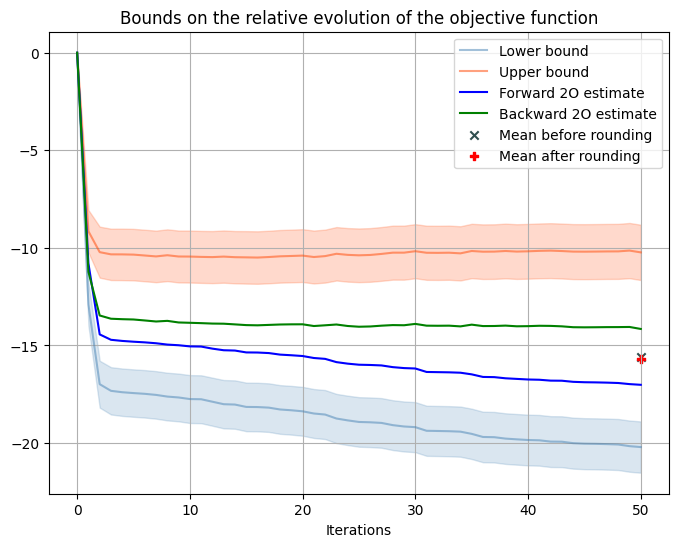

In [5]:
optim = WeightsOptimizer(data, model, sample_adv)

weights = optim.optimize(heuristic="2O-R2", 
                         max_L1=30,
                         max_iterations=50,
                         n_MC_samples_adv=100,
                         n_MC_samples_post=20,
                         eps=1e0,
                         lr=1e-1,
                         betas=(0.5, 0.9),
                         make_plots=True,
                         verbose=True)

Rounding kl difference: 0.04617572
L1 before rounding: 30.0
L1 after rounding: 28.0


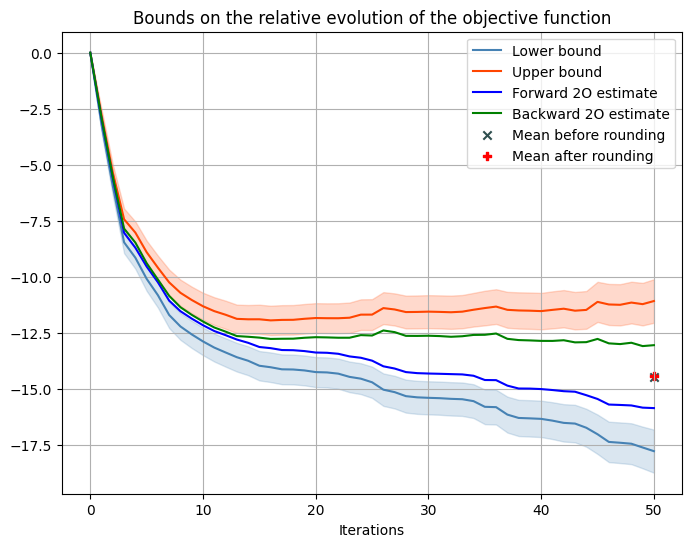

In [6]:
optim = WeightsOptimizer(data, model, sample_adv)

weights = optim.optimize(heuristic="Adam-R2", 
                         max_L1=30,
                         max_iterations=50,
                         n_MC_samples_adv=100,
                         n_MC_samples_post=20,
                         eps=1e0,
                         lr=1e-1,
                         betas=(0.5, 0.9),
                         make_plots=True,
                         verbose=True)

Stopping criterion reached after 36 iterations


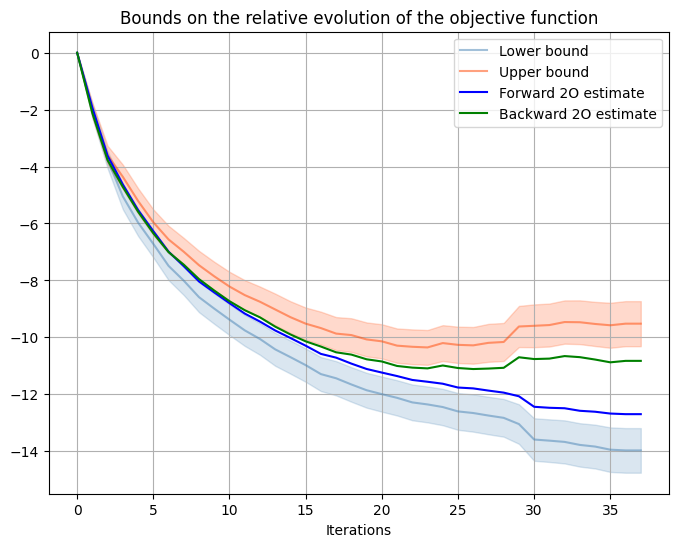

In [7]:
optim = WeightsOptimizer(data, model, sample_adv)

weights = optim.optimize(heuristic="2O-ISCD", 
                         max_L1=30,
                         max_iterations=50,
                         n_MC_samples_adv=100,
                         n_MC_samples_post=20,
                         eps=1e0,
                         betas=(0.9,),
                         make_plots=True,
                         verbose=True)

Stopping criterion reached after 30 iterations


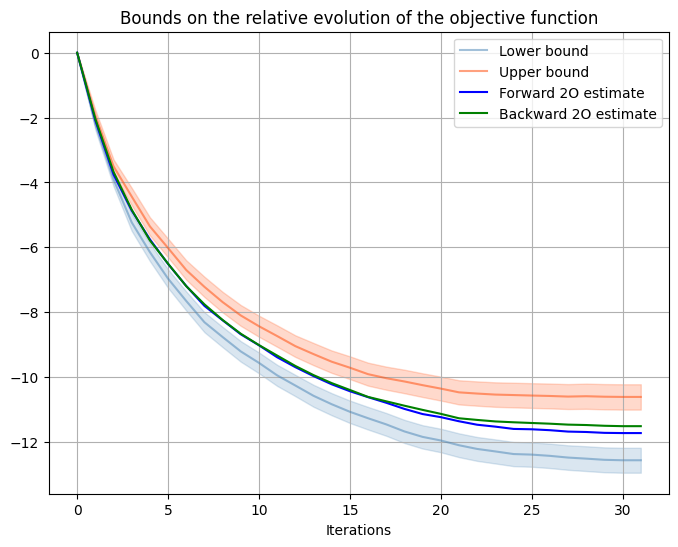

In [8]:
optim = WeightsOptimizer(data, model, sample_adv)

weights = optim.optimize(heuristic="2O-ISCD", 
                         max_L1=30,
                         max_iterations=50,
                         n_MC_samples_adv=100,
                         n_MC_samples_post=100,
                         eps=1e0,
                         betas=(0.9,),
                         make_plots=True,
                         verbose=True)

Stopping criterion reached after 46 iterations


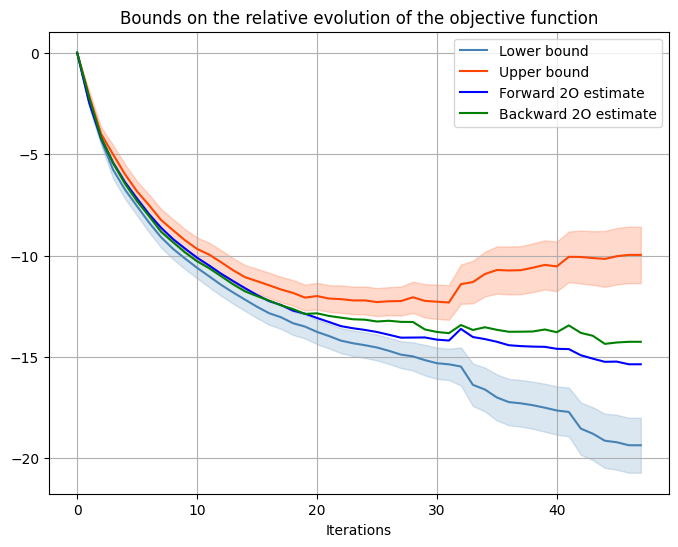

In [9]:
optim = WeightsOptimizer(data, model, sample_adv)

weights = optim.optimize(heuristic="1O-ISCD", 
                         max_L1=30,
                         max_iterations=50,
                         n_MC_samples_adv=100,
                         n_MC_samples_post=20,
                         eps=1e0,
                         betas=(0.9,),
                         make_plots=True,
                         verbose=True)